In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 2: Dividend always growing
https://finance.yahoo.com/
"Historical data": Time period = max, show = Dividends only, Download

In [2]:
stock = pd.read_csv("dividends/PFE.csv", parse_dates=["Date"], index_col="Date")

<Axes: xlabel='Date'>

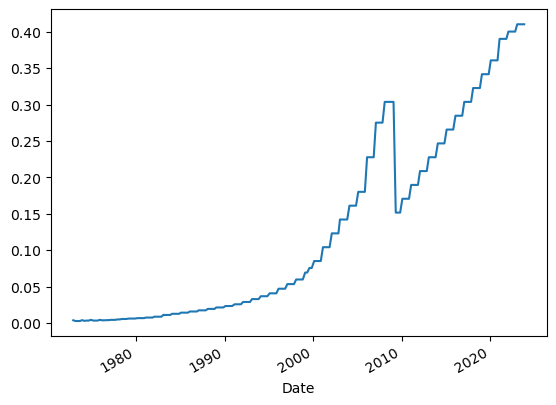

In [3]:
stock.Dividends.plot()

In [5]:
stock["DGR"] = stock.Dividends.pct_change() * 100

<Axes: xlabel='Date'>

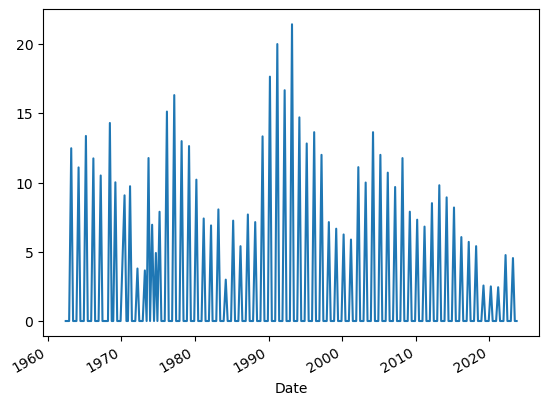

In [6]:
stock.DGR.plot()

# Divident / free cash flow is below 75% and not growing
https://www.morningstar.com/
Financials / Cash flow / Export data

In [7]:
cash = pd.read_excel("cash_flow/KO.xls", sheet_name="KO", index_col="KO_cash-flow_Annual_As_Originally_Reported")
cash.index = cash.index.str.strip()
cash.head()

,2018,2019,2020,2021,2022,TTM
KO_cash-flow_Annual_As_Originally_Reported,,,,,,
"Cash Flow from Operating Activities, Indirect",7.627000e+09,1.047100e+10,9.844000e+09,1.262500e+10,1.101800e+10,1.110100e+10
"Net Cash Flow from Continuing Operating Activities, Indirect",7.320000e+09,1.047100e+10,9.844000e+09,1.262500e+10,1.101800e+10,1.110100e+10
Cash Generated from Operating Activities,7.320000e+09,1.047100e+10,9.844000e+09,1.262500e+10,1.101800e+10,1.110100e+10
Income/Loss before Non-Cash Adjustment,6.727000e+09,8.985000e+09,7.768000e+09,9.804000e+09,9.571000e+09,1.051200e+10
Total Adjustments for Non-Cash Items,1.795000e+09,1.120000e+09,1.386000e+09,1.496000e+09,2.052000e+09,1.024000e+09


In [8]:
cash = cash.transpose()
cash.head()

KO_cash-flow_Annual_As_Originally_Reported,"Cash Flow from Operating Activities, Indirect","Net Cash Flow from Continuing Operating Activities, Indirect",Cash Generated from Operating Activities,Income/Loss before Non-Cash Adjustment,Total Adjustments for Non-Cash Items,"Depreciation, Amortization and Depletion, Non-Cash Adjustment","Depreciation and Amortization, Non-Cash Adjustment","Stock-Based Compensation, Non-Cash Adjustment","Deferred Taxes, Non-Cash Adjustment","Net Investment Income/Loss, Non-Cash Adjustment",...,Common Stock Dividends Paid,Other Financing Cash Flow,Net Cash Flow from Discontinuing Financing Activities,"Cash and Cash Equivalents, End of Period",Change in Cash,Effect of Exchange Rate Changes,"Cash and Cash Equivalents, Beginning of Period",Cash Flow Supplemental Section,"Change in Cash as Reported, Supplemental",Fiscal year ends in Dec 31 | USD
2018,7.627000e+09,7.320000e+09,7.320000e+09,6.727000e+09,1.795000e+09,1.086000e+09,1.086000e+09,225000000.0,-450000000.0,-495000000.0,...,-6.644000e+09,-2.430000e+08,205000000.0,9.318000e+09,3.207000e+09,-262000000.0,6.373000e+09,NaN,2.945000e+09,NaN
2019,1.047100e+10,1.047100e+10,1.047100e+10,8.985000e+09,1.120000e+09,1.365000e+09,1.365000e+09,201000000.0,-280000000.0,-330000000.0,...,-6.845000e+09,-2.270000e+08,NaN,6.737000e+09,-2.509000e+09,-72000000.0,9.318000e+09,NaN,-2.581000e+09,NaN
2020,9.844000e+09,9.844000e+09,9.844000e+09,7.768000e+09,1.386000e+09,1.536000e+09,1.536000e+09,126000000.0,-18000000.0,-599000000.0,...,-7.047000e+09,3.100000e+08,NaN,7.110000e+09,2.970000e+08,76000000.0,6.737000e+09,NaN,3.730000e+08,NaN
2021,1.262500e+10,1.262500e+10,1.262500e+10,9.804000e+09,1.496000e+09,1.452000e+09,1.452000e+09,337000000.0,894000000.0,-529000000.0,...,-7.252000e+09,-3.530000e+08,NaN,1.002500e+10,3.074000e+09,-159000000.0,7.110000e+09,NaN,2.915000e+09,NaN
2022,1.101800e+10,1.101800e+10,1.101800e+10,9.571000e+09,2.052000e+09,1.260000e+09,1.260000e+09,356000000.0,-122000000.0,-635000000.0,...,-7.616000e+09,-1.095000e+09,NaN,9.825000e+09,5.000000e+06,-205000000.0,1.002500e+10,NaN,-2.000000e+08,NaN


In [9]:
#cash.columns.tolist()

In [10]:
#cash[["Cash Flow from Operating Activities, Indirect", "            Cash Dividends Paid", "        Capital Expenditure, Reported"]]

In [12]:
cash = cash.rename(columns={"Cash Flow from Operating Activities, Indirect": "operating"})
cash = cash.rename(columns={"Cash Dividends Paid": "dividends_paid"})
cash = cash.rename(columns={"Capital Expenditure, Reported": "capex"})
cash.head()

KO_cash-flow_Annual_As_Originally_Reported,operating,"Net Cash Flow from Continuing Operating Activities, Indirect",Cash Generated from Operating Activities,Income/Loss before Non-Cash Adjustment,Total Adjustments for Non-Cash Items,"Depreciation, Amortization and Depletion, Non-Cash Adjustment","Depreciation and Amortization, Non-Cash Adjustment","Stock-Based Compensation, Non-Cash Adjustment","Deferred Taxes, Non-Cash Adjustment","Net Investment Income/Loss, Non-Cash Adjustment",...,Common Stock Dividends Paid,Other Financing Cash Flow,Net Cash Flow from Discontinuing Financing Activities,"Cash and Cash Equivalents, End of Period",Change in Cash,Effect of Exchange Rate Changes,"Cash and Cash Equivalents, Beginning of Period",Cash Flow Supplemental Section,"Change in Cash as Reported, Supplemental",Fiscal year ends in Dec 31 | USD
2018,7.627000e+09,7.320000e+09,7.320000e+09,6.727000e+09,1.795000e+09,1.086000e+09,1.086000e+09,225000000.0,-450000000.0,-495000000.0,...,-6.644000e+09,-2.430000e+08,205000000.0,9.318000e+09,3.207000e+09,-262000000.0,6.373000e+09,NaN,2.945000e+09,NaN
2019,1.047100e+10,1.047100e+10,1.047100e+10,8.985000e+09,1.120000e+09,1.365000e+09,1.365000e+09,201000000.0,-280000000.0,-330000000.0,...,-6.845000e+09,-2.270000e+08,NaN,6.737000e+09,-2.509000e+09,-72000000.0,9.318000e+09,NaN,-2.581000e+09,NaN
2020,9.844000e+09,9.844000e+09,9.844000e+09,7.768000e+09,1.386000e+09,1.536000e+09,1.536000e+09,126000000.0,-18000000.0,-599000000.0,...,-7.047000e+09,3.100000e+08,NaN,7.110000e+09,2.970000e+08,76000000.0,6.737000e+09,NaN,3.730000e+08,NaN
2021,1.262500e+10,1.262500e+10,1.262500e+10,9.804000e+09,1.496000e+09,1.452000e+09,1.452000e+09,337000000.0,894000000.0,-529000000.0,...,-7.252000e+09,-3.530000e+08,NaN,1.002500e+10,3.074000e+09,-159000000.0,7.110000e+09,NaN,2.915000e+09,NaN
2022,1.101800e+10,1.101800e+10,1.101800e+10,9.571000e+09,2.052000e+09,1.260000e+09,1.260000e+09,356000000.0,-122000000.0,-635000000.0,...,-7.616000e+09,-1.095000e+09,NaN,9.825000e+09,5.000000e+06,-205000000.0,1.002500e+10,NaN,-2.000000e+08,NaN


In [132]:
cash = cash[["operating", "dividends_paid", "capex"]]

KeyError: "['capex'] not in index"

In [102]:
cash["free_cash_flow"] = cash["operating"] + cash["capex"]
cash["div_per_cash"] = (cash["dividends_paid"] / cash["free_cash_flow"]) * 100 * (-1)

In [103]:
cash

PG_cash-flow_Annual_As_Originally_Reported,operating,dividends_paid,capex,free_cash_flow,div_per_cash
2019,1.524200e+10,-7.498000e+09,-3.347000e+09,1.189500e+10,63.034889
2020,1.740300e+10,-7.789000e+09,-3.073000e+09,1.433000e+10,54.354501
2021,1.837100e+10,-8.263000e+09,-2.787000e+09,1.558400e+10,53.022331
2022,1.672300e+10,-8.770000e+09,-3.156000e+09,1.356700e+10,64.642146
2023,1.684800e+10,-8.999000e+09,-3.062000e+09,1.378600e+10,65.276367
TTM,1.684800e+10,-8.999000e+09,-3.062000e+09,1.378600e+10,65.276367
